In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
# Downloading latest data

import requests


new_cases = requests.get(
    'https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/jhu/new_cases.csv')

with open('new_cases.csv', 'wb') as f:
    f.write(new_cases.content)


In [3]:
# VARS

period_of_time = 60
country = 'Poland'


In [4]:
# opening file
data = pd.read_csv('new_cases.csv')

# extracting data from poland
data = data[[country]]

# last Y days
y = data.tail(period_of_time)


In [5]:
# from 0 to X
x = np.arange(0, period_of_time, 1).reshape(period_of_time, 1)

# making DataFrame from array
x = pd.DataFrame(x)


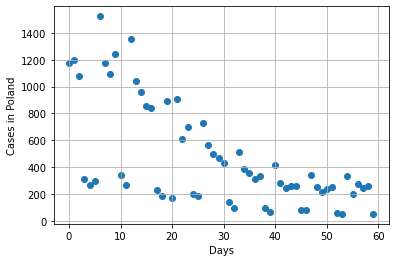

In [6]:
# plotting

plt.ylabel(f'Cases in {country}')
plt.xlabel('Days')
plt.grid()
plt.scatter(x, y)

plt.plot()

plt.savefig('covid_cases.jpeg')


In [7]:
plt.close()


In [8]:
# % of positive tests
import datetime
# get new data every 2 days

positive_tests = requests.get(
    'https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/testing/covid-testing-all-observations.csv')

with open('positive_tests.csv', 'wb') as f:
    f.write(positive_tests.content)


In [9]:
df = pd.read_csv('positive_tests.csv')
df = df[['Entity', 'Date', 'Short-term positive rate']]
df = df[df.Entity == f'{country} - tests performed']
df
last_date = df['Date'].tail(1).values[0]


In [10]:
df = df.rename(columns={'Short-term positive rate': 'positive-rate'})
# Last Y days
y = df.tail(period_of_time)

y = y['positive-rate'] * 100


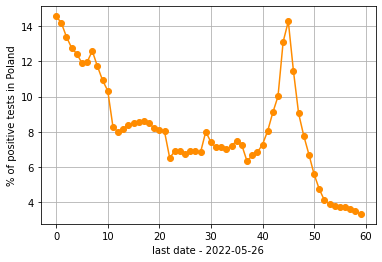

In [11]:
# plotting

plt.ylabel(f'% of positive tests in {country}')
plt.xlabel(f'last date - {last_date}')
plt.grid()
#plt.scatter(x, y)

plt.plot(x, y, '-o', color='#ff8c00')
plt.savefig('covid_tests.jpeg')


In [12]:
plt.close()
